<a href="https://colab.research.google.com/github/saadatialirezam-create/bioinformatics-project/blob/main/occlusion_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
with open('/content/drive/MyDrive/brain_tumor_lists_resized.pkl', 'rb') as f:
    data = pickle.load(f)

notumor_imgs_resized = data['notumor']
pituitary_imgs_resized = data['pituitary']
meningioma_imgs_resized = data['meningioma']
glioma_imgs_resized = data['glioma']

In [3]:
notumor_imgs_resized[222].shape

(224, 224, 3)

In [10]:
import numpy as np
from PIL import Image

def occlude_image_resize_donor(img, same_class_imgs, patch_size=32):
    H, W, _ = img.shape

    # 1) انتخاب یک تصویر رندوم از همان کلاس
    donor = same_class_imgs[np.random.randint(len(same_class_imgs))]

    # 2) resize کل donor به 26×26
    donor_small = np.array(Image.fromarray(donor).resize((patch_size, patch_size)))

    # 3) انتخاب جای رندوم روی تصویر اصلی
    x = np.random.randint(0, W - patch_size + 1)
    y = np.random.randint(0, H - patch_size + 1)

    # 4) چسباندن
    out = img.copy()
    out[y:y+patch_size, x:x+patch_size, :] = donor_small
    return out


In [11]:
def build_occlusion_list(img_list, patch_size=32):
    occluded_list = []

    for img in img_list:
        occluded = occlude_image_resize_donor(img, img_list, patch_size)
        occluded_list.append(occluded)

    return occluded_list

In [12]:
notumor_imgs_occlusion = build_occlusion_list(notumor_imgs_resized, patch_size=32)
pituitary_imgs_occlusion = build_occlusion_list(pituitary_imgs_resized, patch_size=32)
meningioma_imgs_occlusion = build_occlusion_list(meningioma_imgs_resized, patch_size=32)
glioma_imgs_occlusion = build_occlusion_list(glioma_imgs_resized, patch_size=32)

print(len(notumor_imgs_resized), "->", len(notumor_imgs_occlusion))
print(len(pituitary_imgs_resized), "->", len(pituitary_imgs_occlusion))
print(len(meningioma_imgs_resized), "->", len(meningioma_imgs_occlusion))
print(len(glioma_imgs_resized), "->", len(glioma_imgs_occlusion))


1595 -> 1595
1457 -> 1457
1339 -> 1339
1321 -> 1321


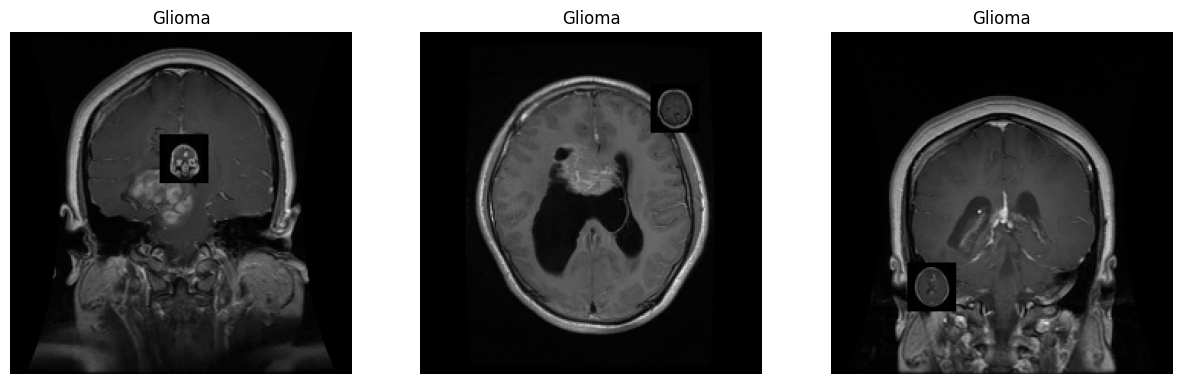

In [17]:
import matplotlib.pyplot as plt

num_show = 3
plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = glioma_imgs_occlusion[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("Glioma")
    plt.axis('off')

In [16]:
notumor_imgs_occlusion_x2 = notumor_imgs_occlusion + notumor_imgs_resized
pituitary_imgs_occlusion_x2 = pituitary_imgs_occlusion + pituitary_imgs_resized
meningioma_imgs_occlusion_x2 = meningioma_imgs_occlusion + meningioma_imgs_resized
glioma_imgs_occlusion_x2 = glioma_imgs_occlusion + glioma_imgs_resized

print(len(notumor_imgs_occlusion_x2), "->", len(notumor_imgs_resized))
print(len(pituitary_imgs_occlusion_x2), "->", len(pituitary_imgs_resized))
print(len(meningioma_imgs_occlusion_x2), "->", len(meningioma_imgs_resized))
print(len(glioma_imgs_occlusion_x2), "->", len(glioma_imgs_resized))

3190 -> 1595
2914 -> 1457
2678 -> 1339
2642 -> 1321


In [18]:
import pickle

data = {
    'notumor': notumor_imgs_occlusion_x2,
    'pituitary': pituitary_imgs_occlusion_x2,
    'meningioma': meningioma_imgs_occlusion_x2,
    'glioma': glioma_imgs_occlusion_x2
}

with open('/content/drive/MyDrive/brain_tumor_lists_occlusion.pkl', 'wb') as f:
    pickle.dump(data, f)